In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import mandelbrot

#### Define subarea class

In [24]:
class subarea:
    
    def __init__(self, par_a, par_i, prob):
        
        # Create a mandelbrot object for this area
        self.mandel = mandelbrot.mandel(par_a)
        
        # Edges of the subarea
        self.x_min = par_a[0]
        self.x_max = par_a[1]
        self.y_min = par_a[2]
        self.y_max = par_a[3]
        
        # Sampling probability
        self.probability = prob
        self.iterations = par_i
        
        # Variable that indicates if the probability should be increased
        self.prob_incr = False
    
    def subdivide(self, n_subareas):
        
        # Set the initial coordinates at the minimal value
        x_min = self.x_min
        x_max = self.x_min
        y_min = self.y_min
        y_max = self.y_min
        
        # List to store the newly created subareas
        new_subareas = []
        # Equally distribute the sampling probability over the subareas
        new_prob = self.probability / n_subareas
        
        # Calculate the length of the subareas
        distance_x = (self.x_max - self.x_min) / np.sqrt(n_subareas)
        distance_y = (self.y_max - self.y_min) / np.sqrt(n_subareas)
        
        # Determine the edges of the subareas
        for _ in range(int(np.sqrt(n_subareas))):
            # The minimal value is the maximal value of the previous subarea
            x_min = x_max
            x_max += distance_x
            
            for _ in range(int(np.sqrt(n_subareas))):
                y_min = y_max
                y_max += distance_y
                
                # Create subarea
                new_subareas.append(subarea([x_min, x_max, y_min, y_max], self.iterations, new_prob))
            
            y_min = self.y_min
            y_max = self.y_min
        
        return new_subareas

#### Creating subareas

In [33]:
area = [-2, 1, -1, 1]
max_iter = 200
total_samples = 1000

In [34]:
subspaces = subarea(area, max_iter, 1)
subspaces = subspaces.subdivide(16)

In [35]:
samplepoints = []
est_areas = []

# Improve sampling locations 5 times
for n in range(5):
    
    prob_decr = 0           # Total probability decrease over all the subareas
    n_areas_incr = 0        # Number of subareas for which the probability should increase
    total_mandel_area = 0
    
    points = np.empty(0)
    
    for subspace in subspaces:
        
        # Determine number of samples in subarea
        n_samples = int(subspace.probability * total_samples) + 1
    
        # Calculate the mandelbrot area in the subarea
        mandel_area, samples = subspace.mandel.est_area(n_samples, subspace.iterations, method = 'latin_hypercube')
        total_mandel_area += mandel_area
        
        # Store the samplepoints
        if len(points) == 0:
            points = samples
        else:
            points = np.concatenate((points, samples))
        
        
        if mandel_area == 0:
            # Areas outside of the Mandelbrot set
            subspace.iterations = 200 
            subspace.probability /= 2
            prob_decr += subspace.probability

        elif mandel_area == subspace.mandel.area:
            # Areas inside of the Mandelbrot set
            subspace.probability /= 2
            prob_decr += subspace.probability

        else:
            # Areas on the edge of the Mandelbrot set
            subspace.iterations = 200 * (n + 1) 
            subspace.prob_incr = True
            n_areas_incr += 1
        
    # Increase the probability of the important areas
    add_prob = prob_decr / n_areas_incr
    new_subspaces = []
    
    for subspace in subspaces:
        if subspace.prob_incr == True:
            subspace.probability += add_prob
            subspace.prob_incr = False
        
        # Subdivide the areas every other iteration
        if n % 2 == 0:
            new_subareas = subspace.subdivide(4)
            new_subspaces += new_subareas
    
    if n % 2 == 0:
        subspaces = new_subspaces
        
    # Store the all the sampling points in this iteration
    samplepoints.append(points)
    # Store the estimated area
    est_areas.append(total_mandel_area)

In [37]:
est_areas

[1.583333333333333,
 1.546875,
 1.5498579545454545,
 1.484765625,
 1.5126581477732794]

In [38]:
samples_in_arr = [len(samplepoints[i]) for i in range(len(samplepoints))]
samples_in_arr

[1008, 1040, 1026, 1152, 1140]

In [39]:
#ccolors = ["ko","g."]
ccolors = ["ko", "ko","r.","b.","g."]
#ccolors = ["ko","ko","ko","r.","r.","r.","b.","b.","g.","g."]

#### Samples in first iteration

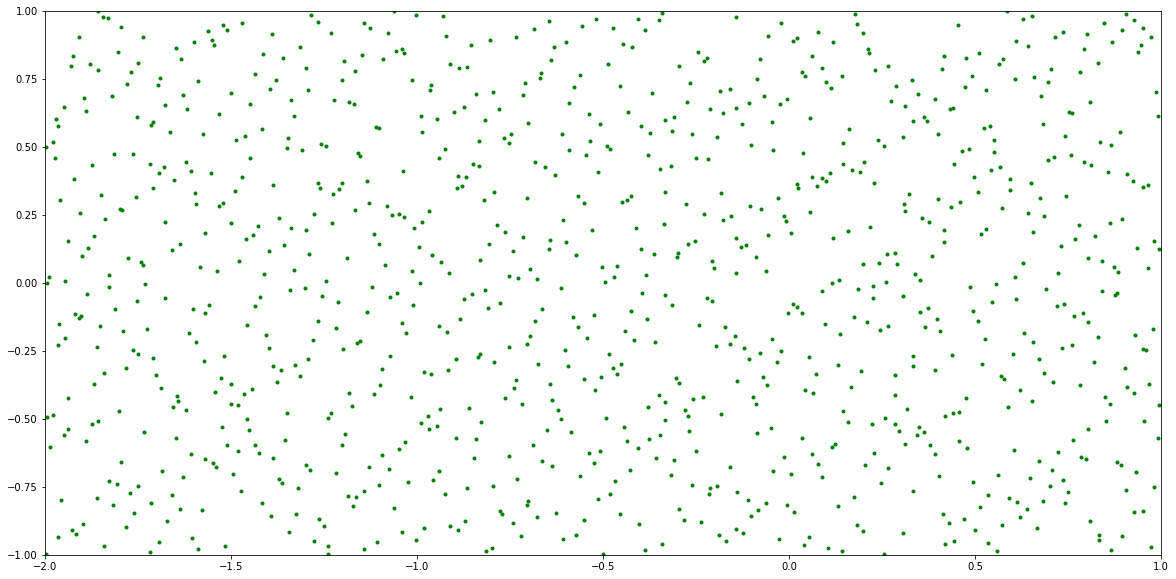

In [42]:
plt.figure(figsize=(20, 10))
orthos = np.transpose(samplepoints[0])
plt.plot(orthos[0],orthos[1], ccolors[4],linewidth=0.001)
plt.ylim(-1,1)
plt.xlim(-2,1)
plt.show()

#### Samples in the second iteration

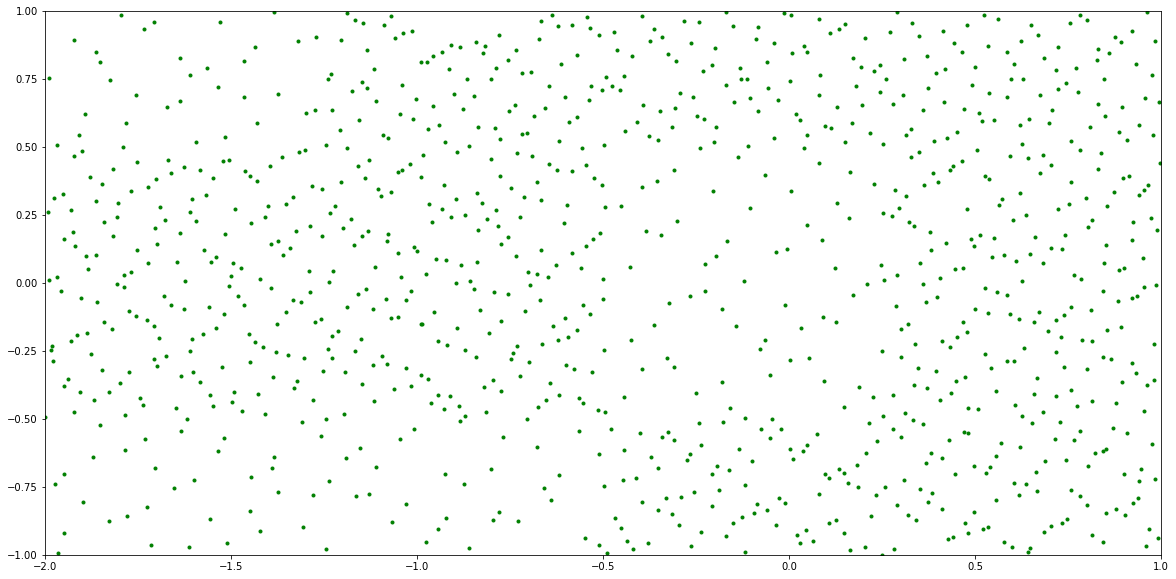

In [43]:
plt.figure(figsize=(20, 10))
orthos = np.transpose(samplepoints[1])
plt.plot(orthos[0],orthos[1], ccolors[4],linewidth=0.001)
plt.ylim(-1,1)
plt.xlim(-2,1)
plt.show()

#### Samples in the third iteration

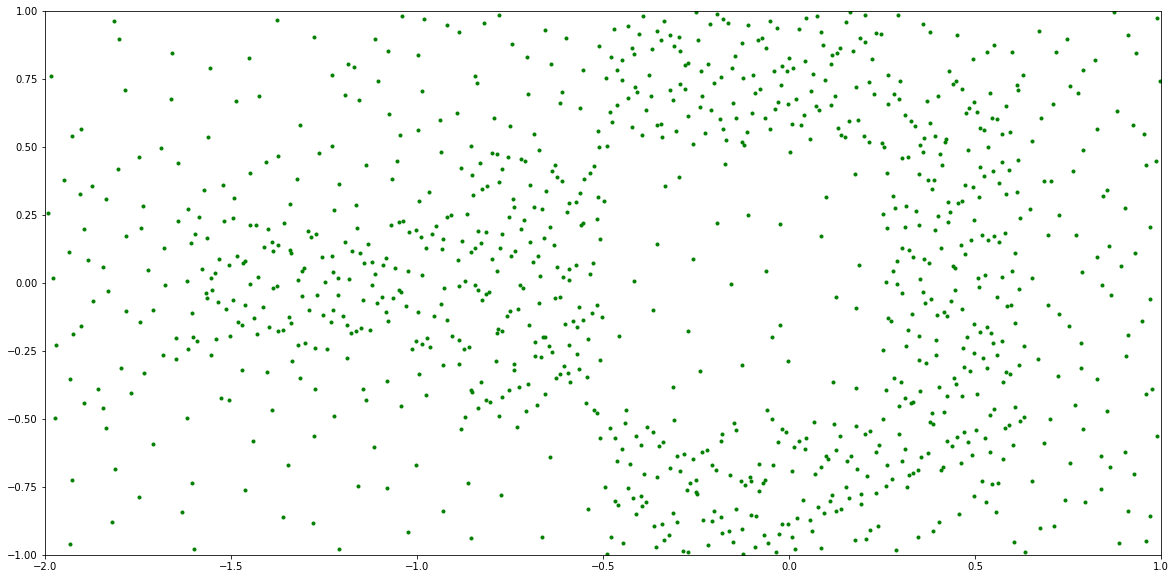

In [45]:
plt.figure(figsize=(20, 10))
orthos = np.transpose(samplepoints[2])
plt.plot(orthos[0],orthos[1], ccolors[4],linewidth=0.001)
plt.ylim(-1,1)
plt.xlim(-2,1)
plt.show()

#### Samples in the fourth iteration

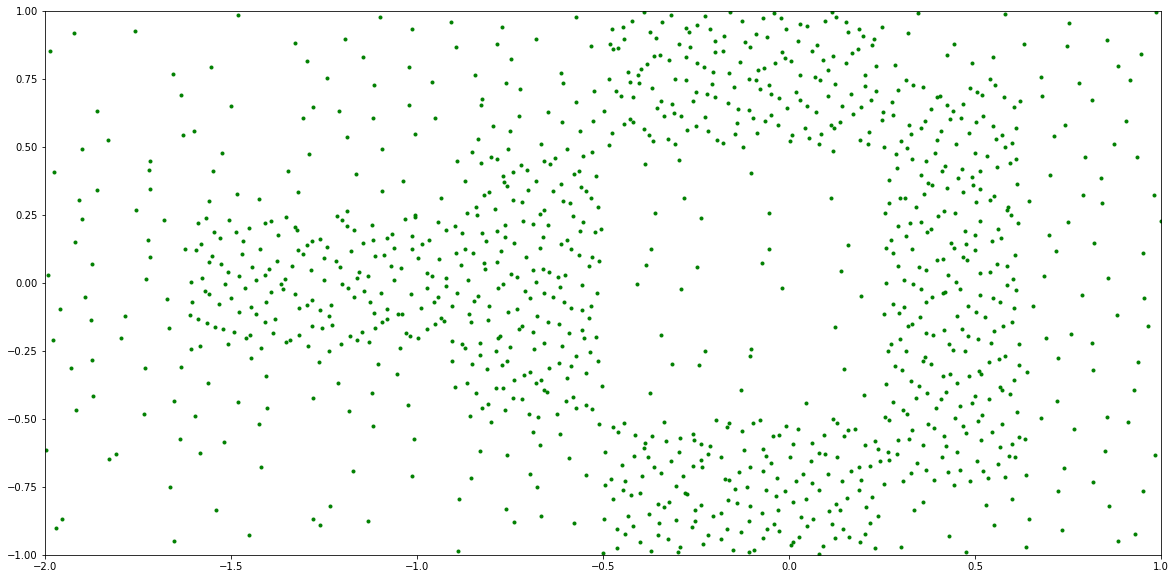

In [46]:
plt.figure(figsize=(20, 10))
orthos = np.transpose(samplepoints[3])
plt.plot(orthos[0],orthos[1], ccolors[4],linewidth=0.001)
plt.ylim(-1,1)
plt.xlim(-2,1)
plt.show()

#### Samples in the fifth iteration

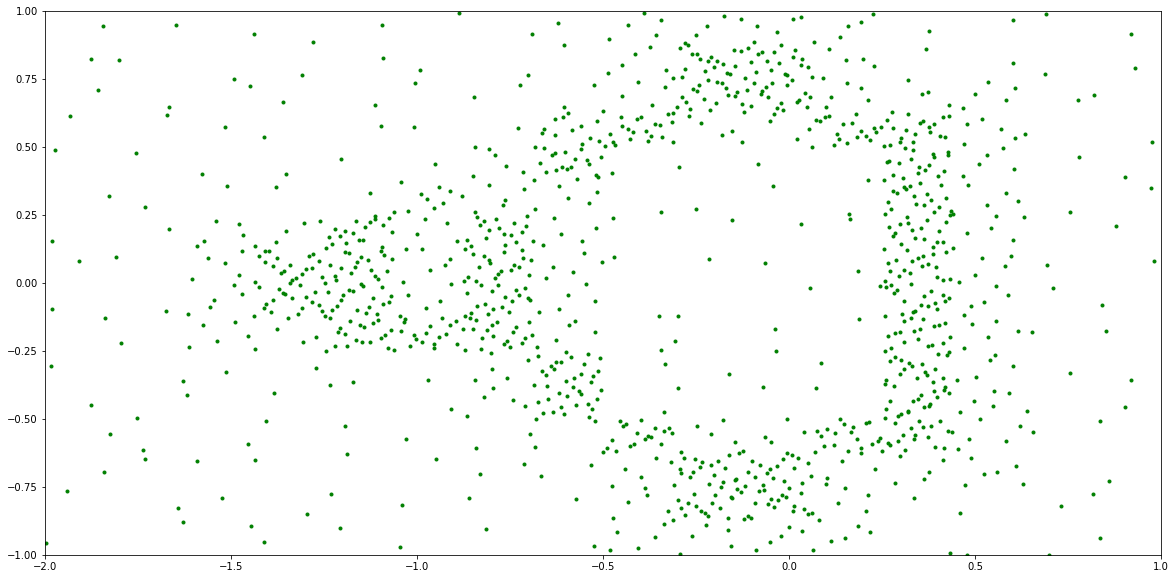

In [47]:
plt.figure(figsize=(20, 10))
orthos = np.transpose(samplepoints[4])
plt.plot(orthos[0],orthos[1], ccolors[4],linewidth=0.001)
plt.ylim(-1,1)
plt.xlim(-2,1)
plt.show()